# Model Draft

In [1]:
# Import packages
from matplotlib import pyplot as plt
from importlib import reload
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import random
import scipy
import math

# Import model classes
from substation import Substation
from PV import PV

## Model Settings

In [2]:
load_dict = {'HouseNew': 10,
             'HouseOld' : 10, 
             'HouseDH': 10, 
             'ApartmentNewDH': 30
            }


# PV

<IPython.core.display.Javascript object>


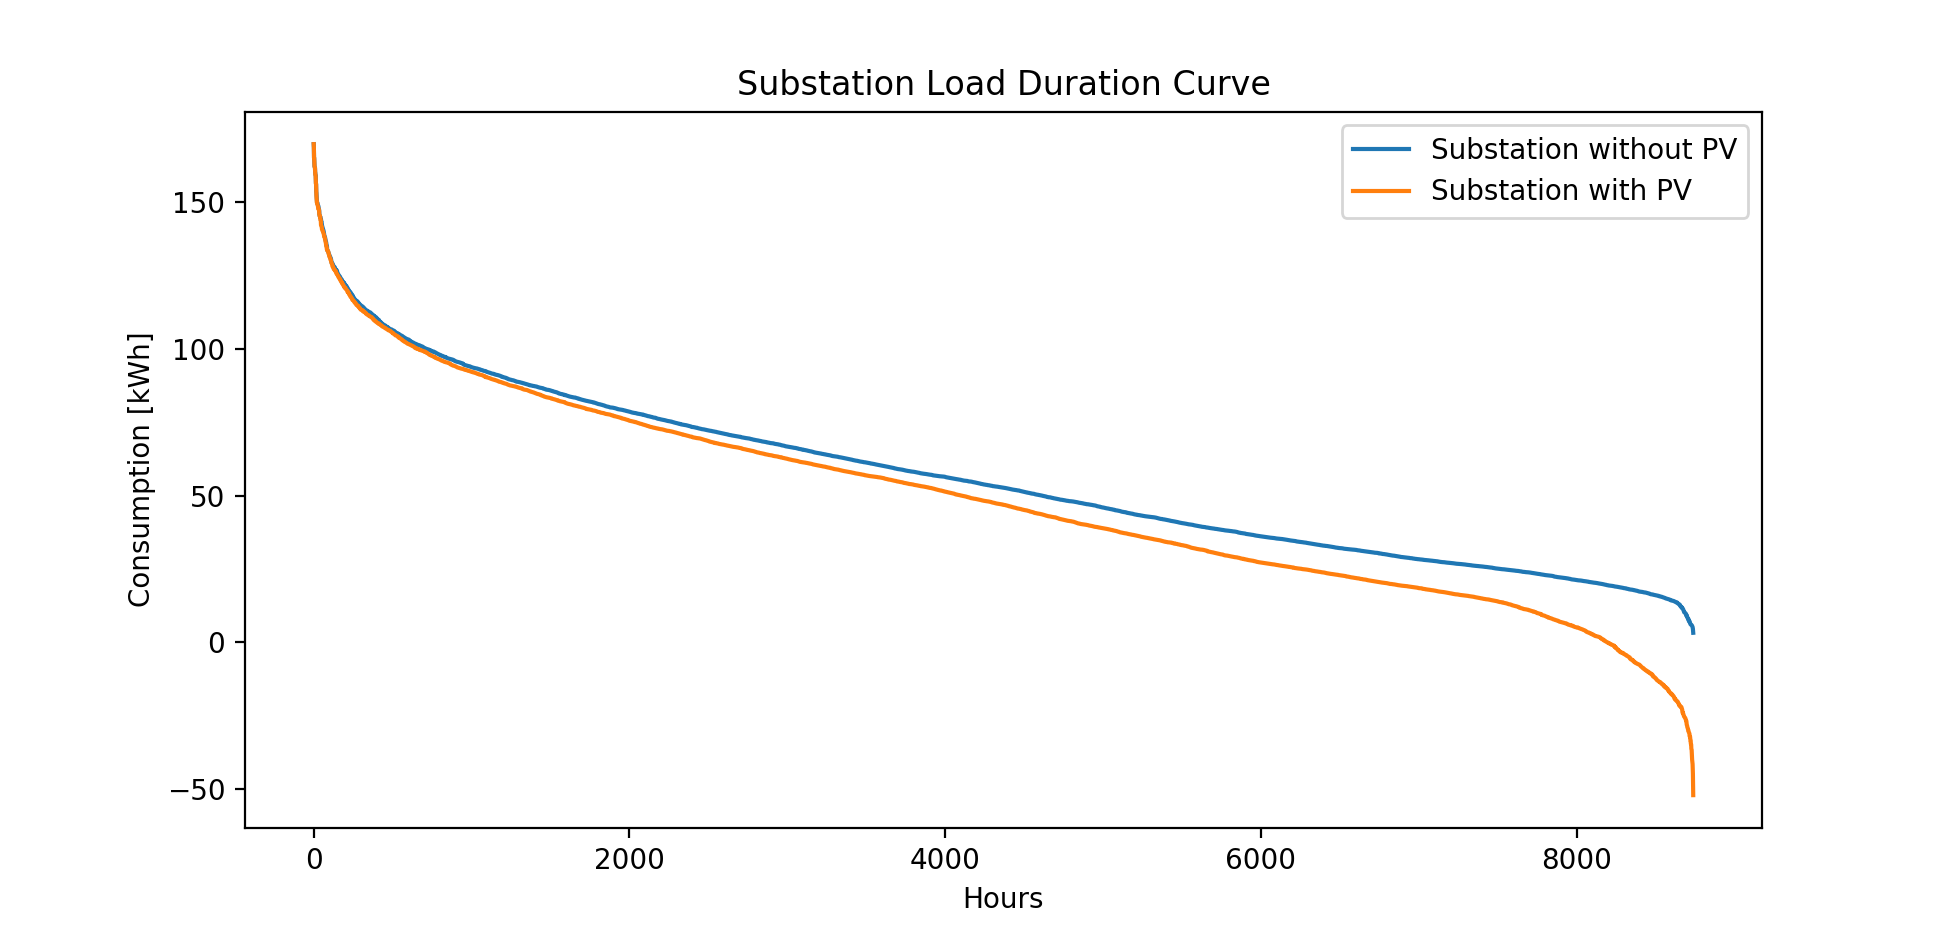

In [19]:
def test_pv():
    station = Substation('Stockholm')
    
    # Add loads to substation
    for load,num in load_dict.items():
        station.add_residential_load(load,num)
    
    # Calculate 1 year consumption with and without PV
    station.update_aggregated_col()
    station.filter_whole_years(jan_start = True, num = 1)
    station.add_PV(size = 400)
    a = station.dataframe['AggregatedLoad'].sort_values(ascending=False).tolist()
    station.update_aggregated_col()
    b = station.dataframe['AggregatedLoad'].sort_values(ascending=False).tolist()
    
    # Plot load duration curves of before and after
    t = np.linspace(0, len(a)+1,len(a))
    plt.plot(t, a, label='Substation without PV') # plotting t, a separately 
    plt.plot(t, b, label='Substation with PV') # plotting t, b separately
    plt.title('Substation Load Duration Curve')
    plt.legend(loc='upper right')
    plt.xlabel('Hours')
    plt.ylabel('Consumption [kWh]')
    plt.show()
    
    '''
    station.print_insights(duration_curve = True,
                           month_plot = False, 
                           weekday_plot = False, 
                           hour_plot = False)
    '''
%matplotlib notebook
test_pv()

# Office Load

In [ ]:
def test_office():
    station = Substation('Stockholm')
    
    #add loads
    for load,num in load_dict.items():
        station.add_residential_load(load,num)
        
    print('No Office')
    station.print_insights(duration_curve = True,
                        month_plot = False, 
                        weekday_plot = False, 
                        hour_plot = False) 
    station.calculate_norm()
    
    print('Hourly average: ', station.mu)
    print('Hourly max: ', station.dataframe['AggregatedLoad'].max())
    
    print('\n')
    station.add_office()
    print('{} Office'.format(station.office_count))
    station.print_insights(duration_curve = True,
                        month_plot = False, 
                        weekday_plot = False, 
                        hour_plot = False) 
    station.calculate_norm()
    
    print('Hourly average: ', station.mu)
    print('Hourly max: ', station.dataframe['AggregatedLoad'].max())
    
    print('\n Only office curve')
    station.plot_load_duration_curve(station.dataframe[station.ID_count].sort_values(ascending=False).tolist())
    
test_office()

# Flex

In [ ]:
def test_flex(days = 50, percent_loads = 0.30, reduction = 0.50):
    # create empty station
    station = Substation('Stockholm')
    
    #add loads
    for load,num in load_dict.items():
        station.add_residential_load(load,num)

    #find instant max 
    station.update_aggregated_col()
    max_consumption = station.dataframe['AggregatedLoad'].max()
    
    #load duration curve before
    station.print_insights(duration_curve = True,
                           month_plot = False, 
                           weekday_plot = False, 
                           hour_plot = False)
    
    #infer flexible loads
    station.introduce_flexibility(days, percent_loads, reduction, only_noDH = False)
    
    #find instant max with flex
    station.update_aggregated_col()
    max_flex_consumption = station.dataframe['AggregatedLoad'].max()
    
    #load duration curve after
    station.print_insights(duration_curve = True,
                           month_plot = False, 
                           weekday_plot = False, 
                           hour_plot = False)
    
    print('The maximal instant consumption of the substation with {} loads is {} without demand side flexibility and {} with {} flexible loads.'.format(station.load_count,max_consumption,max_flex_consumption,station.flex_count))
    
test_flex()

In [ ]:
station.update_aggregated_col()
station.dataframe.head(100)